In [1]:
# notebook for programming a tight binding model

 Path in 1D BZ defined by nodes at [0.  0.5 1. ]



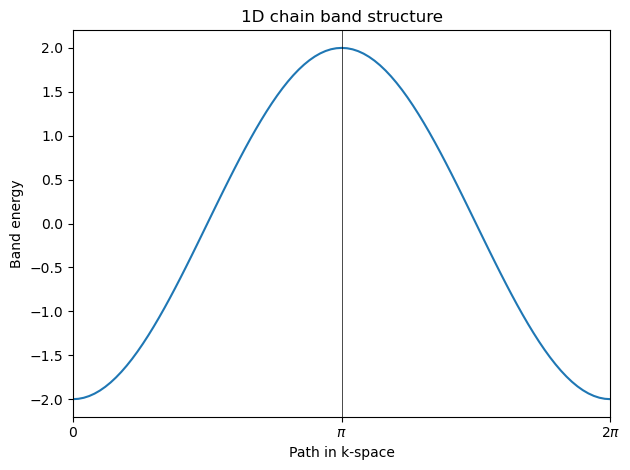

In [3]:
# one dimensional chain

from pythtb import * # import TB model class
import matplotlib.pyplot as plt

# specify model
lat=[[1.0]]
orb=[[0.0]]
my_model=tb_model(1,1,lat,orb)
my_model.set_hop(-1., 0, 0, [1])

# define a path in k-space
(k_vec,k_dist,k_node)=my_model.k_path('full',100)
k_label=[r"$0$",r"$\pi$", r"$2\pi$"]

# solve model
evals=my_model.solve_all(k_vec)

# plot band structure
fig, ax = plt.subplots()
ax.plot(k_dist,evals[0])
ax.set_title("1D chain band structure")
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")
ax.set_xticks(k_node)
ax.set_xticklabels(k_label)
ax.set_xlim(k_node[0],k_node[-1])
for n in range(len(k_node)):
  ax.axvline(x=k_node[n], linewidth=0.5, color='k')
fig.tight_layout()
fig.savefig("simple_band.pdf")

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 2
r-space dimension           = 2
number of spin components   = 1
periodic directions         = [0, 1]
number of orbitals          = 2
number of electronic states = 2
lattice vectors:
 #  0  ===>  [     1.0 ,     0.0 ]
 #  1  ===>  [     0.5 ,   0.866 ]
positions of orbitals:
 #  0  ===>  [  0.3333 ,  0.3333 ]
 #  1  ===>  [  0.6667 ,  0.6667 ]
site energies:
 #  0  ===>      -2.0
 #  1  ===>       2.0
hoppings:
<  0 | H |  1 + [  0 ,  0 ] >     ===>    -10.0 +     0.0 i
<  1 | H |  0 + [  1 ,  0 ] >     ===>    -10.0 +     0.0 i
<  1 | H |  0 + [  0 ,  1 ] >     ===>    -10.0 +     0.0 i
hopping distances:
|  pos(  0 )  - pos(  1 + [  0 ,  0 ] ) |  =    0.5774
|  pos(  1 )  - pos(  0 + [  1 ,  0 ] ) |  =    0.5774
|  pos(  1 )  - pos(  0 + [  0 ,  1 ] ) |  =    0.5774

----- k_path report begin ----------
real-space lattice vectors
 [[1.      0.  

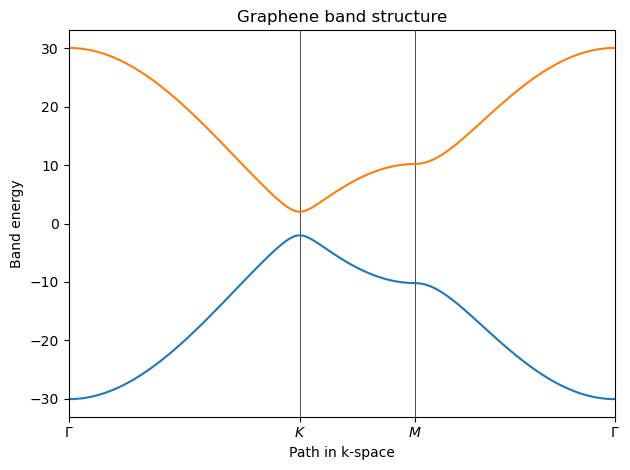

In [15]:
#!/usr/bin/env python

# Toy graphene model

# Copyright under GNU General Public License 2010, 2012, 2016
# by Sinisa Coh and David Vanderbilt (see gpl-pythtb.txt)


# import libraries 
from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
import matplotlib.pyplot as plt

# define lattice vectors (defines the vectors of the unit cell), 
# you can think of these as the new basis vectors defining your coordinate system
lat=[[1.0,0.0],[0.5,np.sqrt(3.0)/2.0]]

# define coordinates of orbitals (location of the atoms within the unit cell)
orb=[[1./3.,1./3.],[2./3.,2./3.]]

# make two dimensional tight-binding graphene model (solves the tightbinding model and generates)
my_model=tb_model(2,2,lat,orb)

# set model parameters
delta=2 # define onsite energy
t=-10.0 # define hopping amplitude, how likely electrons are to hop to adjacent sites 

# set on-site energies
my_model.set_onsite([-delta,delta])

# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t, 0, 1, [ 0, 0])  # hopping from 0 to (1 in the 0's unit cell) 
my_model.set_hop(t, 1, 0, [ 1, 0])  # hopping from 1 to (0 in the unit cell above)
my_model.set_hop(t, 1, 0, [ 0, 1])  # hopping from 1 to (0 in the unit cell to the right)

# print tight-binding model
my_model.display()

# generate list of k-points following a segmented path in the BZ (k-points mean points in momentum space)
# the following line of codes are just generating points in momentum space to plug into our E(k) function
# list of nodes (high-symmetry points) that will be connected
path=[[0.,0.],[2./3.,1./3.],[.5,.5],[0.,0.]]
# labels of the nodes
label=(r'$\Gamma $',r'$K$', r'$M$', r'$\Gamma $')
# total number of interpolated k-points along the path
nk=121

# call function k_path to construct the actual path
(k_vec,k_dist,k_node)=my_model.k_path(path,nk) # solve for reciprocal (momentum space) space vectors
# inputs:
#   path, nk: see above
#   my_model: the pythtb model
# outputs:
#   k_vec: list of interpolated k-points
#   k_dist: horizontal axis position of each k-point in the list
#   k_node: horizontal axis position of each original node

print('---------------------------------------')
print('starting calculation')
print('---------------------------------------')
print('Calculating bands...')

# obtain eigenvalues to be plotted
evals=my_model.solve_all(k_vec) 

# figure for bandstructure

fig, ax = plt.subplots()
# specify horizontal axis details
# set range of horizontal axis
ax.set_xlim(k_node[0],k_node[-1])
# put tickmarks and labels at node positions
ax.set_xticks(k_node)
ax.set_xticklabels(label)
# add vertical lines at node positions
for n in range(len(k_node)):
  ax.axvline(x=k_node[n],linewidth=0.5, color='k')
# put title
ax.set_title("Graphene band structure")
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")

# plot first and second band
ax.plot(k_dist,evals[0])
ax.plot(k_dist,evals[1])

# make an PDF figure of a plot
fig.tight_layout()
fig.savefig("graphene.pdf")

print('Done.\n')